In [1]:
%run '../../dataset-fcpc/pagamento pessoa fisica/read_dataset.py'
%run '../configura_display.py'

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Pagamentos a pessoas físicas da FCPC

Base de dados de pagamentos a pessoas físicas da Fundação Cearense de Pesquisa e Cultura.

O dataset a ser utilizado é a consolidação dos dados disponibilizados no [site da FCPC](http://www.fcpc.ufc.br/AcessoInformacao/PagamentoPessoaFisica).

* **Colunas**
  * **CPF**: mascarado
  * **NOME**
  * **TIPO DE PAGAMENTO**
  * **PROJETO**
  * **DATA**
  * **VALOR \(R$\)**
  
obs: os dados de 2017 são os disponíveis até o momento da coleta

In [3]:
fcpc = read_fcpc("../../dataset-fcpc/pagamento pessoa fisica/")

In [4]:
# estrutura de tabela
# índices à esquerda, gerados automaticamente
fcpc.head()

,DATA,VALOR (R$),CPF,NOME,TIPO DE PAGAMENTO,PROJETO
0,2016-10-18,"2.200,00",***.000.473-**,NILTON CESAR VIEIRA SILVA,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
1,2016-08-22,"2.200,00",***.000.473-**,NILTON CESAR VIEIRA SILVA,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
2,2016-06-17,"2.640,00",***.000.473-**,NILTON CESAR VIEIRA SILVA,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
3,2016-10-18,"2.200,00",***.031.193-**,SERGIO BEZERRA LIMA JUNIOR,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...
4,2016-12-07,"1.980,00",***.031.193-**,SERGIO BEZERRA LIMA JUNIOR,DIÁRIAS,2776 - TERMO DE COOP.PETROBRAS/UFC/FCPC PROJET...


In [5]:
# informações estatísticas sobre os campos numéricos
# quantiles > ex: 75% valor abaixo do qual estão 75% dos dados
# count > quantidade de valores não null
fcpc.describe()

,VALOR (R$)
count,"126.680,00"
mean,"1.660,48"
std,"3.492,49"
min,"0,00"
25%,"177,00"
50%,"400,00"
75%,"2.143,22"
max,"328.428,65"


In [6]:
# informações estatísticas sobre os campos não quantitativos
# top > valor com maior qtd de ocorrências
# freq > qtd de ocorrências do top
fcpc.describe(include = ['O'])

,CPF,NOME,TIPO DE PAGAMENTO,PROJETO
count,126680,126680,126680,126680
unique,16215,17623,12,917
top,***.501.533-**,FRANCISCO RODRIGO PORTO CAVALCANTI,ADIANTAMENTO PARA VIAGENS,2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DO...
freq,259,259,43521,13068


In [7]:
# informações estatísticas sobre os campos datetime
fcpc.describe(include = ['datetime'])

,DATA
count,126680
unique,1774
top,2015-04-20 00:00:00
freq,699
first,2010-01-02 00:00:00
last,2017-12-01 00:00:00


In [8]:
# todo nome de projeto segue o padrão NNNN - XXXXXXXXXX?
fcpc.PROJETO.str.match(r"^\d+\ *\-\ *.+$").all()

False

In [9]:
# adiciona coluna contendo o valor numérico que inicial o nome do projeto
fcpc["PROJETO_ID"] = fcpc.PROJETO.apply(lambda v: v.split("-", maxsplit=1)[0].strip())

In [10]:
# há projetos com mesmo PROJETO_ID mas nomes diferentes(PROJETO)
# assumirei que o PROJETO_ID(número no início do nome do projeto) identifica um projeto
def mesmo_id_mais_de_um_nome(g):
    
    n_projeto_nome = g["PROJETO"].unique()
    
    return len(n_projeto_nome) > 1
    
rp = fcpc.groupby("PROJETO_ID").filter(mesmo_id_mais_de_um_nome)\
.groupby(["PROJETO_ID", "PROJETO"]).size()

rp.head(6)

PROJETO_ID  PROJETO                                        
1016        1016 - CARTA -  UFC/FCPC RADIO UNIVERSITARIA FM       4
            1016 - CARTA - UFC/FCPC RADIO UNIVERSITARIA FM      427
2922        2922 - CT - PETROBRAS - PROJETO AMBES             1.791
            2922 - CT.PETROBRAS - PROJETO AMBES                  18
2925        2925 - CT - FAIMER/FCPC - FAIMER                     23
            2925 - CT. FAIMER/FCPC - FAIMER                       2
dtype: int64

In [11]:
fcpc.isnull().sum()

DATA                0
VALOR (R$)          0
CPF                 0
NOME                0
TIPO DE PAGAMENTO   0
PROJETO             0
PROJETO_ID          0
dtype: int64

In [12]:
fcpc["TIPO DE PAGAMENTO"].value_counts()

ADIANTAMENTO PARA VIAGENS                  43.521
SERVIÇO PRESTADO - RPA                     33.432
FOLHA DE PAGAMENTO - CLT                   25.676
ADIANTAMENTO PARA DESPESAS                 15.570
BOLSA                                       5.401
DIÁRIAS                                     1.917
SERVIÇOS DE TERCEIROS - PESSOA FÍSICA         570
RESSARCIMENTO DE DESPESA                      560
ADIANTAMENTOS                                  18
RECURSOS HUMANOS                               11
DEVOLUÇÃO                                       2
RESSARCIMENTO de DESPESA [ressarcimento]        2
Name: TIPO DE PAGAMENTO, dtype: int64

In [13]:
fcpc.groupby("TIPO DE PAGAMENTO")["VALOR (R$)"].sum().sort_values(ascending=False)

TIPO DE PAGAMENTO
SERVIÇO PRESTADO - RPA                     101.091.942,45
FOLHA DE PAGAMENTO - CLT                    72.897.248,65
BOLSA                                       16.937.885,34
ADIANTAMENTO PARA VIAGENS                   14.721.161,58
ADIANTAMENTO PARA DESPESAS                   2.474.858,72
DIÁRIAS                                      1.184.245,02
SERVIÇOS DE TERCEIROS - PESSOA FÍSICA          519.177,13
RESSARCIMENTO DE DESPESA                       449.610,58
RECURSOS HUMANOS                                49.067,77
ADIANTAMENTOS                                   22.081,00
DEVOLUÇÃO                                        1.996,00
RESSARCIMENTO de DESPESA [ressarcimento]           398,34
Name: VALOR (R$), dtype: float64

In [14]:
fcpc["NOME"].value_counts().nlargest(5)

FRANCISCO RODRIGO PORTO CAVALCANTI   259
RAIMUNDO MENDES DA SILVA             221
RONALDO GLAUBER MAIA DE OLIVEIRA     215
CARLOS CHAGAS CAVALCANTE FREIRE      193
ANTONIO VALDO BARROS DE SOUSA        192
Name: NOME, dtype: int64

In [15]:
fcpc.nlargest(5, "VALOR (R$)")

,DATA,VALOR (R$),CPF,NOME,TIPO DE PAGAMENTO,PROJETO,PROJETO_ID
26.912,2016-12-19,"328.428,65",***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,3098
26.791,2016-12-19,"212.758,81",***.468.963-**,FRANCISCO SULIANO MESQUITA DE PAULA,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,3098
26.943,2016-12-19,"212.391,25",***.966.093-**,FAUSTO NILO COSTA JUNIOR,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,3098
26.627,2016-12-19,"182.058,44",***.140.963-**,FRANCISCO QUEIROZ D. NETO,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,3098
26.920,2015-02-26,"154.874,13",***.839.713-**,FRANCISCO EDUARDO ARAUJO SOARES,SERVIÇO PRESTADO - RPA,3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO ...,3098


In [16]:
top_5 = fcpc.groupby("NOME")["VALOR (R$)"].sum().nlargest(5)
top_5

NOME
FRANCISCO EDUARDO ARAUJO SOARES     1.009.837,94
LEONILDO ADAO CHRISTOFOLETTI          983.093,17
JAVAM DE CASTRO MACHADO               802.283,12
FRANCISCO VANILSON PINHEIRO LEITE     779.393,29
RAQUEL DE MELO ROLIM                  778.440,00
Name: VALOR (R$), dtype: float64

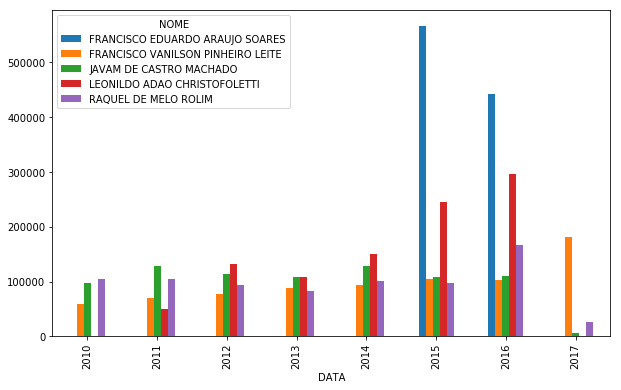

In [17]:
top_5_ = fcpc[fcpc.NOME.isin(top_5.index)]

top_5_.groupby([top_5_.DATA.dt.year, "NOME"])["VALOR (R$)"].sum().unstack().plot(kind="bar", figsize=(10, 6))

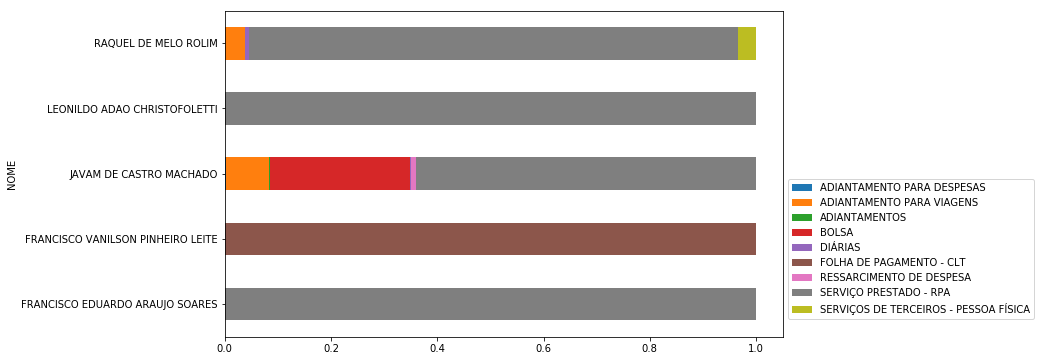

In [20]:
top_5_tdp = top_5_.groupby(["NOME", "TIPO DE PAGAMENTO"])["VALOR (R$)"].sum().unstack().fillna(0)

top_5_tdp.div(top_5_tdp.sum(axis=1), axis=0).plot(kind="barh", stacked=True, figsize=(10, 6))
plt.legend(bbox_to_anchor=(1., .5))

In [21]:
fcpc[fcpc.NOME == "ABELARDO VIEIRA MOTA"]

,DATA,VALOR (R$),CPF,NOME,TIPO DE PAGAMENTO,PROJETO,PROJETO_ID
74.956,2010-11-22,"428,58",***.692.163-**,ABELARDO VIEIRA MOTA,SERVIÇO PRESTADO - RPA,2266 - CARTA LG/FCPC - OUTROS CORRELATOS,2266


In [22]:
# recisão como projeto
fcpc.groupby("PROJETO")["VALOR (R$)"].sum().nlargest(5)

PROJETO
0101 - FCPC                                                                           11.295.825,98
3098 - CT - FCPC/IPLANFOR - PLANO ESTRATÉGICO FORTALEZA 2040                           7.373.401,34
1089 - RESCISAO CONTRATUAL                                                             6.617.825,17
2924 - CT - UFC/FCPC - IMPLANTACAO E OFERTA DOS CURSOS DE GRADUACAO DA UAB/UFC 2012    6.264.561,69
2922 - CT - PETROBRAS - PROJETO AMBES                                                  5.753.658,23
Name: VALOR (R$), dtype: float64

In [23]:
fcpc[fcpc.PROJETO == "1089 - RESCISAO CONTRATUAL"].groupby("TIPO DE PAGAMENTO").sum()

,VALOR (R$)
TIPO DE PAGAMENTO,
FOLHA DE PAGAMENTO - CLT,"6.485.842,25"
RECURSOS HUMANOS,"19.659,97"
SERVIÇO PRESTADO - RPA,"112.322,95"


In [24]:
fcpc.groupby("PROJETO")["VALOR (R$)"].mean().nlargest(5)

PROJETO
3134 - TERMO DE COOPERACAO HENRY/UFC/FCPC                    35.416,67
2325 - CT - GAIA/FCPC - DESENVOLVIMENTO DE SOFTWARE          32.607,77
2983 - CT - UFC/FCPC - PLANO DE BENEFICIOS DO PODER EXECUT   21.925,93
3204 - TC - GNATUS/UFC/FCPC                                  21.844,44
2826 - CT - BNDES/FCPC-CRESCIMENTO ECONOMICOS                20.076,95
Name: VALOR (R$), dtype: float64

In [25]:
fcpc[fcpc.PROJETO == "3134 - TERMO DE COOPERACAO HENRY/UFC/FCPC"]

,DATA,VALOR (R$),CPF,NOME,TIPO DE PAGAMENTO,PROJETO,PROJETO_ID
119.052,2015-03-31,"35.416,67",***.438.673-**,CLEITON MACIEL ROCHA DA SILVA,SERVIÇO PRESTADO - RPA,3134 - TERMO DE COOPERACAO HENRY/UFC/FCPC,3134


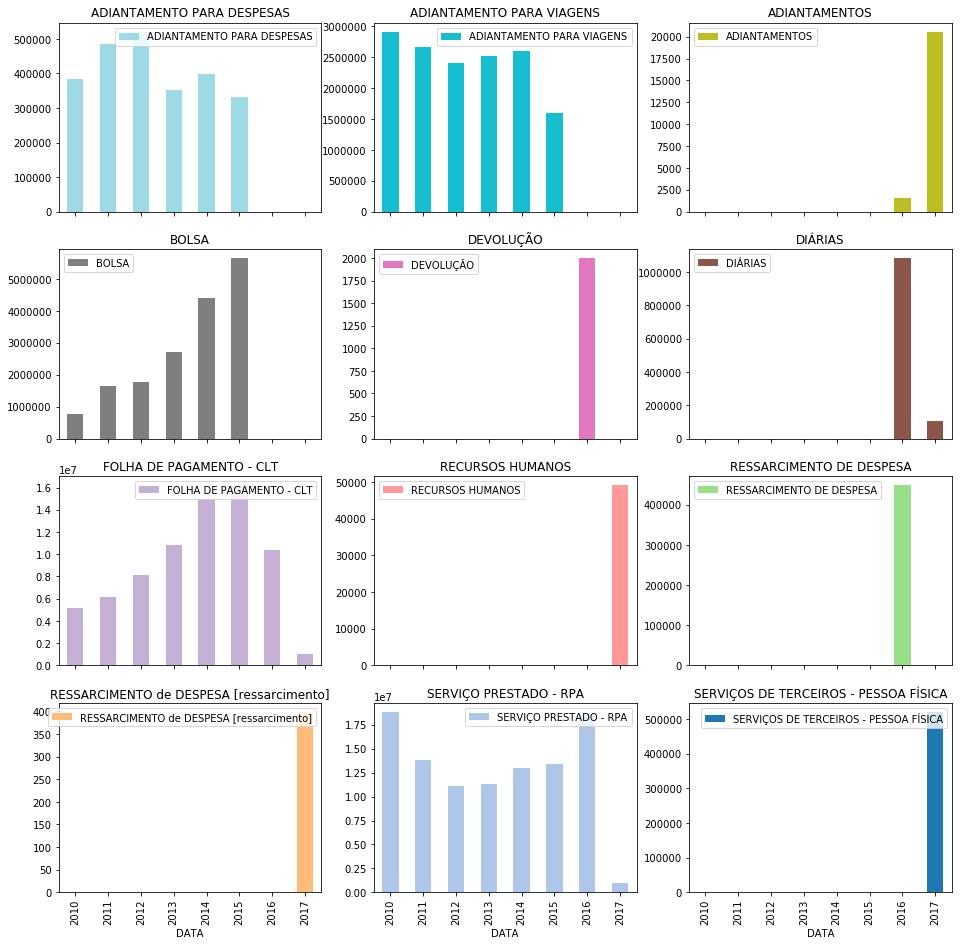

In [30]:
tpv = fcpc.groupby([fcpc.DATA.dt.year, "TIPO DE PAGAMENTO"])["VALOR (R$)"].sum().unstack().fillna(0)

tpv.plot(kind="bar", figsize=(16, 16), cmap=plt.cm.Vega20_r, subplots=True, layout=(4, 3))
pass